# APA Laboratori 1 (TEMA 1)  - Ridge and standard regression  

In [1]:
# Uncomment to upgrade packages
# !pip install pandas --upgrade 
# !pip install numpy --upgrade
# !pip install scipy --upgrade
# !pip install statsmodels --upgrade
# !pip install scikit-learn --upgrade
%load_ext autoreload

 Començarem fent bàsicament l'exemple introductori del TEMA 1 (ajust polinòmic)

In [2]:
#%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('precision', 3)

In [3]:
# extra imports
from numpy.random import uniform, normal
from statsmodels.genmod.generalized_linear_model import GLM
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

In [4]:
np.random.seed(7)

In [5]:
N = 20
a = 0
b = 1
sigma_quadrat = 0.3**2

 Generació de la mostra TR (de training) de mida N, inputs x_n uniformes en (0,1)

El sort() és per claredat, no té cap importància

Noteu que a classe era N=10 per pura simplicitat del dibuix a la pissarra!

In [6]:
x = np.sort(uniform( a,b,N))
t = np.sin(2*np.pi*x) + normal(loc=0, 
                               scale=np.sqrt(sigma_quadrat),
                               size=N)
sample = pd.DataFrame({'input':x,'target':t})
sample

,input,target
0,0.025,0.322
1,0.066,0.440
2,0.072,0.520
3,0.076,0.003
4,0.213,1.469
5,0.268,1.040
6,0.288,0.855
7,0.381,1.289
8,0.438,0.364
9,0.452,-0.139


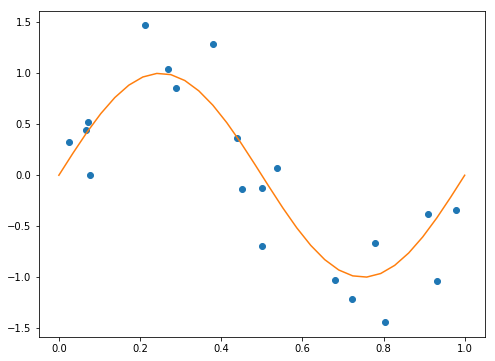

In [7]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(sample.input, sample.target, 'o')
ax.plot(np.linspace(0, 1,num=30), 
        np.sin(2*np.pi*np.linspace(0, 1,num=30)));

Generació de la mostra de validacio (VA) de mida N.valid, inputs x equiespaiats en (a,b)
 la usarem per fer prediccions

In [8]:
N_valid = 1000

x_valid = np.sort(uniform( a,b,N_valid))
t_valid = np.sin(2*np.pi*x_valid) + normal(loc=0, 
                                           scale=np.sqrt(sigma_quadrat),
                                           size=N_valid)
valid_sample =  pd.DataFrame({'input':x_valid,'target':t_valid})

 <div class="alert alert-block alert-info">
 
 Regressió lineal amb grau M=1, per començar, model lineal
 </div>


Fem servir la classe GLM de statsmodels perque te una sortida similar a la funcio de R, pero teniu implememntats tots els generalized linear models a scikit-learn. Tambe es pot fer la regresio lineal directament fent servir la classe OLS (Ordinary Least Squares) de statsmodels.

In [10]:
# Podem fer servir formules con a R, 
# pero encara no soporta totes les caracteristiques de R
model = GLM.from_formula('target ~ input', sample) 
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                   20
Model:                            GLM   Df Residuals:                       18
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.37100
Method:                          IRLS   Log-Likelihood:                -17.410
Date:                Thu, 13 Sep 2018   Deviance:                       6.6779
Time:                        17:32:39   Pearson chi2:                     6.68
No. Iterations:                     3   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8802      0.257      3.423      0.001       0.376       1.384
input         -1.8980      0.453     -4.189      0.000      -2.786      -1.010
==============================================================================
"""

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Results: Generalized linear model
=============================================================
Model:              GLM              AIC:            38.8190 
Link Function:      identity         BIC:            -47.2453
Dependent Variable: target           Log-Likelihood: -17.410 
Date:               2018-09-13 17:32 LL-Null:        -26.236 
No. Observations:   20               Deviance:       6.6779  
Df Model:           1                Pearson chi2:   6.68    
Df Residuals:       18               Scale:          0.37100 
Method:             IRLS                                     
-------------------------------------------------------------
               Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------
Intercept      0.8802   0.2571  3.4234 0.0006  0.3763  1.3841
input         -1.8980   0.4531 -4.1887 0.0000 -2.7860 -1.0099
=============================================================

"""

fem-lo predir les dades TR (les usades per trobar el model) i calculem l'error quadràtic mitjà

In [10]:
prediccio = pd.DataFrame({'prediccio':result.predict(exog=sample.input)})
prediccio

,prediccio
0,0.833
1,0.755
2,0.743
3,0.735
4,0.475
5,0.371
6,0.333
7,0.157
8,0.048
9,0.022


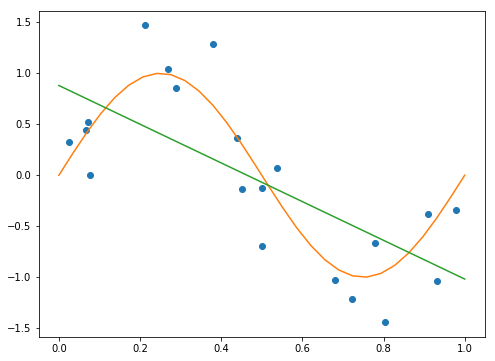

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(sample.input, sample.target, 'o')
ax.plot(np.linspace(0, 1,num=30), 
        np.sin(2*np.pi*np.linspace(0, 1,num=30)));
ax.plot(np.linspace(0, 1,num=30), 
        result.params.Intercept+result.params.input*np.linspace(0, 1,num=30));


In [12]:
mean_square_error = np.sum((sample.target - prediccio.prediccio)**2)/N
mean_square_error


0.33389610292629496

alternativament, glm() ens el calcula

In [13]:
result.deviance/N

0.33389610292629496

 Dit tot això, reprenem el fil i tornem a l'error quadràtic mitjà. Resulta que és convenient treballar amb la seva arrel, per obtenir així la "llargada" del vector d'errors

In [14]:
root_mse = np.sqrt(result.deviance/N)
root_mse

0.577837436418146

però és encara millor normalitzar l'error, dividint per la variança dels targets, obtenint el que s'anomena NMSE (normalized mean squared error)

In [15]:
NMSE = result.deviance/((N-1)*np.var(sample.target))
NMSE

0.5330463679571131

 Interpretació:
 
1. Òbviament NMSE >= 0, però no té cota superior definida
2. un model constant que predigui la mitjana dels targets (de fet, el millor model constant), tindria un NMSE = 1.
3. models amb NMSE > 1 són per tant horribles; un model es comença a considerar acceptable a partir de NMSE < 0.2
4. observeu que, notant que l'error quadràtic no és més que l'estimació de la variança dels targets, el NMSE es pot veure com la fracció de la variança dels targets no explicada (capturada) per les prediccions del model. Per exemple, un NMSE = 0.13 correspon a un model capaç d'explicar el 87% de la variabilitat del target.

 El nostre model M=1 explica per tant només el 47% de la variabilitat del target.

<div class="alert alert-block alert-info">
 Regressió cúbica (polinomi de grau M=3, continua sent un model lineal, penseu-lo)
</div>

In [16]:
# El metode np.vander genera una matriu amb les potencies 
# d'un vector de valors (potencies de 0 a n-1)
model = GLM(sample.target, 
            np.vander(sample.input,4, increasing=True))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                   20
Model:                            GLM   Df Residuals:                       16
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                         0.14813
Method:                          IRLS   Log-Likelihood:                -7.0508
Date:                Fri, 07 Sep 2018   Deviance:                       2.3701
Time:                        08:20:15   Pearson chi2:                     2.37
No. Iterations:                     3   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2517      0.294     -0.856      0.392      -0.828       0.325
x1            13.1664      2.868      4.591      0.000       7.545      18.787
x2           -37.9735      7.043     -5.392      0.000     -51.777     -24.170
x3            25.0637      4.714      5.317      0.000      15.825      34.303
==============================================================================
"""

In [17]:
result.params

const    -0.252
x1       13.166
x2      -37.973
x3       25.064
dtype: float64

 o sigui el polinomi és y(x) = 25.063691·x^3 -37.973481·x^2 + 13.166378·x -0.251710

 Std. Error és la incertesa de cada coeficient, relativa al valor del coeficient; en aquest cas són molt altes, cosa que és deguda a que només tenim 20 punts 

 La darrera columna és un test sobre la probabilitat de que cada coeficient sigui en realitat zero (i per tant, l'entrada x corresponent no té relació amb el target). Els talls de significativitat del coeficient de major a menor son:

 Signif:  0 > 0.001 > 0.01 > 0.05 > 0.1 > 1

 Ara ho dibuixem tot de nou

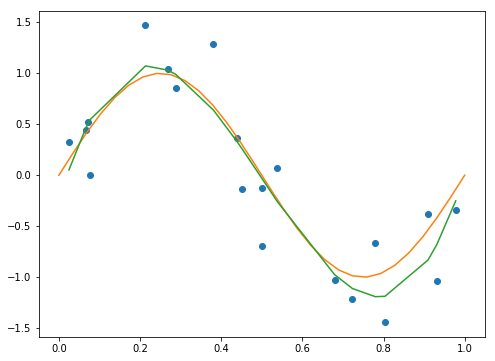

In [18]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(sample.input, sample.target, 'o')
ax.plot(np.linspace(0, 1,num=30), 
        np.sin(2*np.pi*np.linspace(0, 1,num=30)));
ax.plot(sample.input, 
        result.predict(exog=np.vander(sample.input, 
                                      4, 
                                      increasing=True)));

 calculem l'error normalitzat NRMSE a la mostra de TR

In [19]:
NMSE = result.deviance/((N-1)*np.var(sample.target))
NMSE

0.18918715127406932

 gairebé 81%, ha millorat força ... per cert, aquesta quantitat és el famós coeficient R^2 d'ajust en regressió (expressat com a 0.81)


 Ara veurem com calcular l'error normalitzat a la mostra de validacio
 hem de fer-ho explícitament, ja que predict() només dóna les prediccions, no els errors

fem un cop d'ull primer a les dades de VA

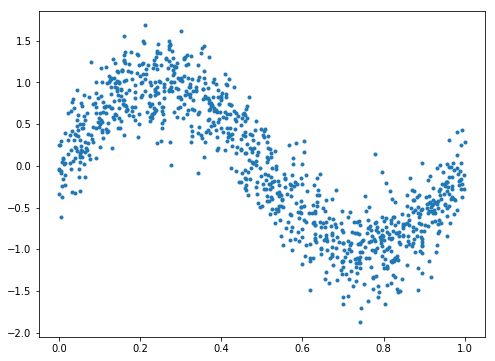

In [20]:
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(valid_sample.input, valid_sample.target, '.');

i calculem l'error

In [21]:
prediccions = pd.DataFrame({'prediccio':
                            result.predict(exog=np.vander(valid_sample.input,
                                                          4, 
                                                          increasing=True))})
NMSE_valid = np.sum((valid_sample.target - prediccions.prediccio)**2)/  \
                    ((N_valid-1)*np.var(valid_sample.target))
NMSE_valid

0.17144211872698972

Quan un model és incorrecte, el seu error de predicció és alt. En cas de models sobreajustats, sol ser molt superior al de TR. En cas de models infraajustats (com és el cas ara), tots dos són elevats i similars. Aquest és un model raonable i per tant tos dos errors són baixos i similars.

 <div class="alert alert-block alert-info">
 Ara farem la mateixa simulació que a classe, fent regressió polinòmica, de graus M des de p a q (poden ser arbitraris, els fixarem en 1 i N-1)
</div>
   desem coeficients del polinomi (del model) i els error de training i validacio

In [22]:
p = 1
q = N

coef = []
model = []
norm_mse_train = []
norm_mse_valid = []

for i in range(p,q):
  cmodel = GLM(sample.target, 
               np.vander(sample.input,i+1, increasing=True))
  fmodel = cmodel.fit()
  coef.append(fmodel.params)
  norm_mse_train.append(fmodel.deviance/((N-1)*np.var(sample.target)))

  prediccions = fmodel.predict(exog=np.vander(valid_sample.input,
                                              i+1, increasing=True))  
  norm_mse_valid.append(sum((valid_sample.target - prediccions)**2)/  \
                        ((N_valid-1)*np.var(valid_sample.target)))
  model.append(fmodel)


/usr/local/lib64/python3.6/site-packages/statsmodels/regression/_tools.py:99: RuntimeWarning: divide by zero encountered in double_scalars
  scale = np.dot(wresid, wresid) / df_resid


dibuixem 6 dels models (graus 1,2,3,4,9,19) contra les dades de training

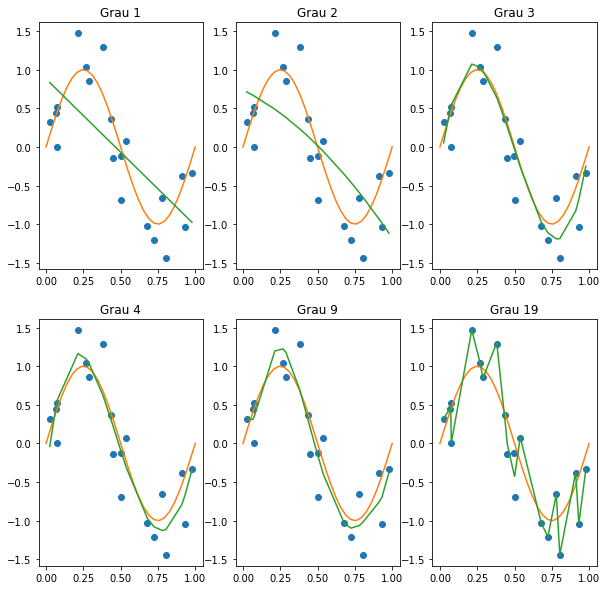

In [23]:
fig = plt.figure(figsize=(10,10))


for f, i in enumerate([1,2,3,4,9,19]):
    ax = fig.add_subplot(2,3,f+1)
    ax.plot(sample.input, sample.target, 'o')
    ax.plot(np.linspace(0, 1,num=30), 
            np.sin(2*np.pi*np.linspace(0, 1,num=30)));
    ax.plot(sample.input, 
            model[i-1].predict(exog=np.vander(sample.input,
                                              i+1, 
                                              increasing=True)));
    plt.title('Grau %d'%i)
0;

 Ara dibuixem les prediccions dels mateixos models contra les dades de validacio
 la funció a modelar està sempre en taronja, per referència

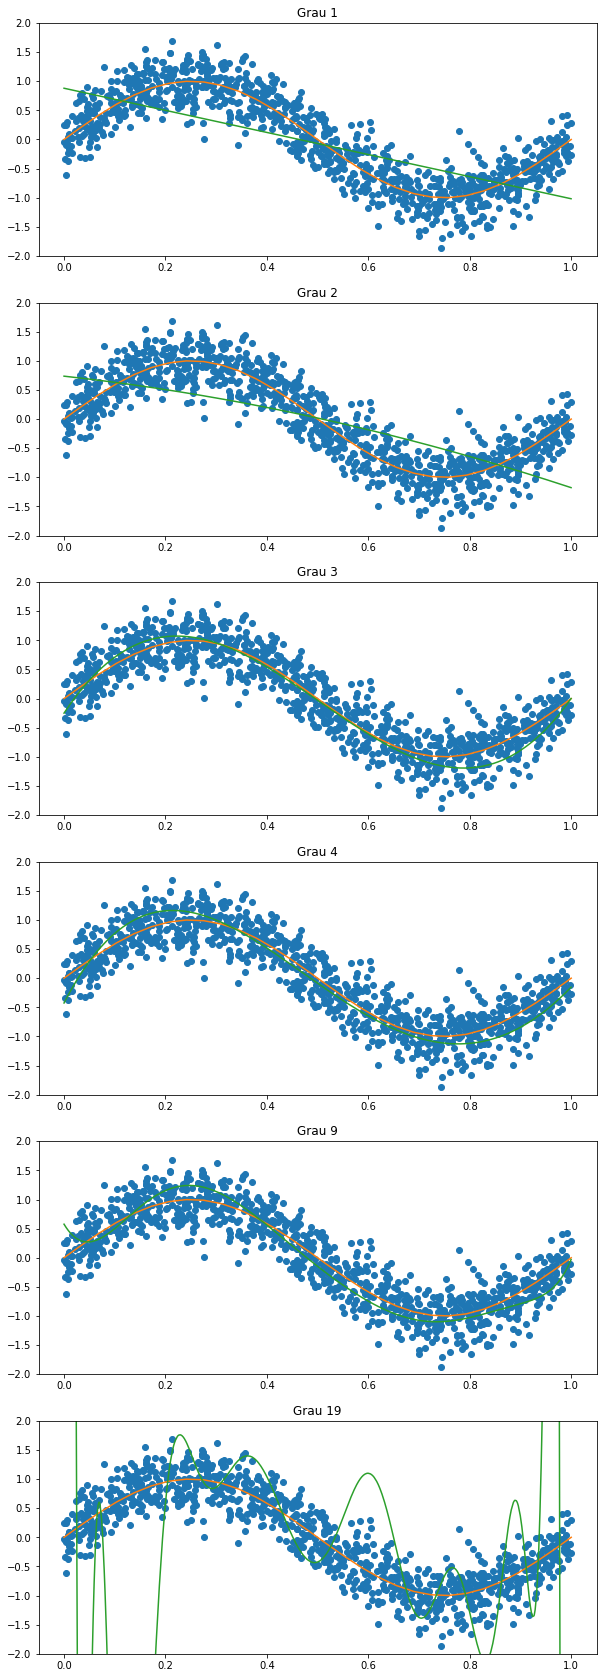

In [24]:
fig = plt.figure(figsize=(10,30))

for f, i in enumerate([1,2,3,4,9,19]):
    ax = fig.add_subplot(6,1,f+1)
    ax.set_ylim([-2,2])
    ax.plot(valid_sample.input, valid_sample.target, 'o')
    ax.plot(np.linspace(0, 1,num=30), 
            np.sin(2*np.pi*np.linspace(0, 1,num=30)));
    ax.plot(valid_sample.input, 
            model[i-1].predict(exog=np.vander(valid_sample.input,
                                              i+1, 
                                              increasing=True)));
    plt.title('Grau %d'%i)
0;

 Ara farem una gràfica similar a la de classe: error de TR i error de VA junts, en funció del grau M; observarem els fenòmens de sobreajust i infraajust molt clarament

Ometem els graus a partir del 13 perquè els valors es disparen i caurien fora del dibuix; però podeu mirar els resultats numèrics a la matriu:

In [25]:
r = pd.DataFrame({'Grau':range(p,q), 
                  'Error.train':norm_mse_train, 
                  'Error.valid': norm_mse_valid})
r

,Grau,Error.train,Error.valid
0,1,0.533,0.466
1,2,0.523,0.467
2,3,0.189,0.171
3,4,0.185,0.177
4,5,0.171,0.175
5,6,0.160,0.188
6,7,0.159,0.188
7,8,0.159,0.191
8,9,0.159,0.188
9,10,0.137,0.709


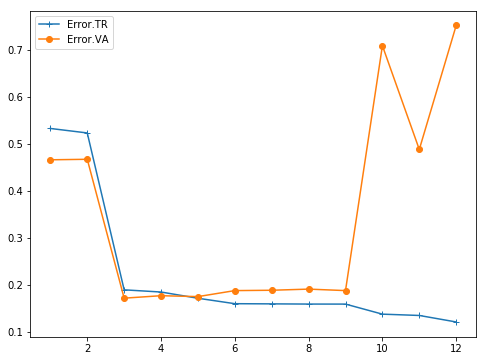

In [26]:
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(range(1,13), norm_mse_train[0:12], '-+', label='Error.TR')
plt.plot(range(1,13), norm_mse_valid[0:12], '-o', label='Error.VA')
plt.legend();

 Per un pèl, el menor error de VA és per M=3, per tant el métode vist a classe seleccionaria el model correcte (se'n diu "model selection"). Noteu que el "model selection" és bàsicament la detecció de la complexitat adequada al problema (la millor en aquest cas, --és a dir, dins els polinomis-- correspón a un de cúbic). Més endavant tractarem el tema de la "complexitat" d'un model des d'un de vista més general.


 Ara investigarem els propis coeficients: veurem que tot coeficient del mateix grau va fent-se gran (en valor absolut) a mesura que puja el grau màxim (tret del coeficient de grau 0 o Intercept, que més o menys es manté constant, donat que intenta seguir la mitjana dels targets, que no varia)

 Estudiem només fins al grau 10, per fer la taula manegable

In [27]:
coefs_table = np.zeros((10,11))

for i in range(10):
    for j in range(i+2):
        coefs_table[i][j] = coef[i][j]
        

pd.DataFrame(coefs_table.T)

,0,1,2,3,4,5,6,7,8,9
0,0.880,0.736,-0.252,-0.429,0.017,0.486,0.563,0.688,0.579,4.578e+00
1,-1.898,-0.962,13.166,16.934,4.601,-10.906,-14.487,-21.918,-14.637,-2.960e+02
2,0.000,-0.953,-37.973,-54.586,28.295,169.588,219.365,350.786,203.747,6.468e+03
3,0.000,0.000,25.064,50.415,-166.690,-706.091,-991.928,-1956.273,-667.099,-6.444e+04
4,0.000,0.000,0.000,-12.486,229.610,1216.832,2020.865,5615.382,-375.048,3.576e+05
5,0.000,0.000,0.000,0.000,-96.358,-954.865,-2128.604,-9551.261,6628.664,-1.207e+06
6,0.000,0.000,0.000,0.000,0.000,284.807,1138.897,9742.263,-16513.357,2.575e+06
7,0.000,0.000,0.000,0.000,0.000,0.000,-244.895,-5483.782,19735.113,-3.484e+06
8,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1304.006,-11902.681,2.899e+06
9,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2904.694,-1.352e+06


 si cap a la finestra, movem-ne els marges: és important veure la taula d'una sola peça

 Interpretació:
1. Les files són els coeficients dels diferents graus 1..M i les columnes els graus M; per exemple, [3,4] és el coeficient de grau 3 del polinomi M=4
2. tot coeficient del mateix grau va fent-se gran (en valor absolut) a mesura que puja el grau màxim
3. Això implica que a mesura que creix M, *tots* els coeficients es fan molt grans. I ens suggereix que, tot i sobreestimar el grau M, podríem controlar l'ajust si poguéssim limitar aquest creixement: això porta a la tècnica de regularització (que en estadística es coneix com a "ridge regression")


 <div class="alert alert-block alert-info">
 Ara comprovarem que el sobreajust disminueix amb N !!!
</div>

 generació de la mostra de training de mida N, inputs x equiespaiats en (a,b)

In [28]:
# abans eren 20, la resta és exactament igual
N_big=100
x = np.linspace(0,1, num=100)     
t = np.sin(2*np.pi*x) + normal(loc=0, 
                               scale=np.sqrt(sigma_quadrat),
                               size=N_big)

big_sample = pd.DataFrame({'input':x,'target':t})

In [29]:
model = GLM(big_sample.target, 
            np.vander(big_sample.input,10, increasing=True))
result = model.fit()

nmse_train =result.deviance/((N_big-1)*np.var(big_sample.target))
nmse_train

0.1548887440222033

In [30]:
prediccions = pd.DataFrame({'prediccio':
                            result.predict(exog=np.vander(valid_sample.input,
                                                          10, increasing=True))})
nmse_valid = np.sum((valid_sample.target - prediccions.prediccio)**2)/  \
                    ((N_big-1)*np.var(valid_sample.target))
nmse_valid


1.5912845280448578

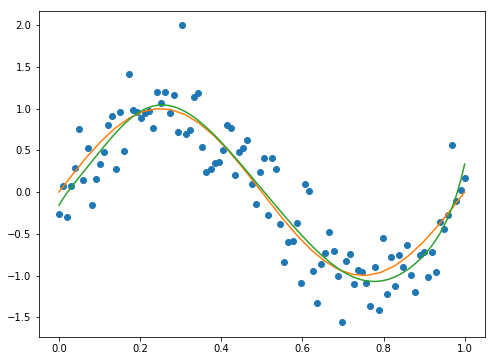

In [31]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(big_sample.input, big_sample.target, 'o')
ax.plot(np.linspace(0, 1,num=30), 
        np.sin(2*np.pi*np.linspace(0, 1,num=30)));
ax.plot(big_sample.input, 
        result.predict(exog=np.vander(big_sample.input,
                                      10, 
                                      increasing=True)));

 Sí: estem modelant el TR amb M=9 i no sobreajusta tant (compareu-lo amb la gràfica que hem generat abans)

 Conclusió: a mesura que N es fa gran el problema del sobreajust s'alleuja força. En
general, però, el concepte "N gran" depèn de quantes variables x usem per modelar i, a més, no és usual tenir control sobre N; per tant, en la pràctica caldrà restringir la mida dels coeficients.

# Ridge regression

<div class="alert alert-block alert-info">
 Ara passem a regressió ridge per re-ajustar el TR més gran (N=100)
</div>

 Aquesta és la idea de la regularització; partim d'una especificació de model sobradament complexe (M=11) i limitem explícitament la mida (en valor absolut) dels coeficients, via el paràmetre lambda (constant de regularització)

 La gràcia ara és estimar un bon valor per lambda: veurem més endavant que es pot fer de manera molt eficient quan el model és lineal. Provem doncs dins una seqüència de valors molt llarga:

In [32]:
# ara farem servir la Ridge regression de scikit learn 
# que es mes practica que la de statsmodels
pcoef = 11
lambdes = np.linspace(0.001, 0.5, num=500)


 aquest seria el model "estàndar" (sense regularitzar)

In [33]:
model = GLM(sample.target, 
            np.vander(sample.input,pcoef+1, increasing=True))
result = model.fit()

aquest seria el model regularitzat

In [34]:
model_ridge = Ridge(fit_intercept=False)
coefs=[]

for a in lambdes:
    model_ridge.set_params(alpha=a)
    model_ridge.fit(np.vander(sample.input,pcoef+1, 
                              increasing=True), 
                    sample.target)
    coefs.append(model_ridge.coef_)
    
coefs = np.array(coefs);

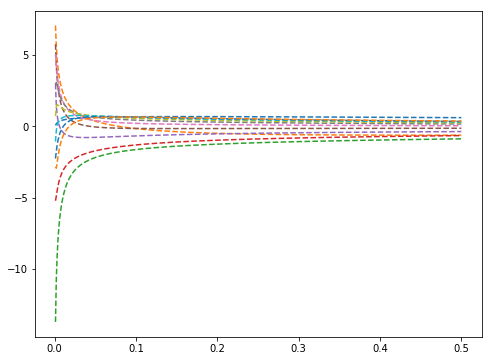

In [35]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(pcoef+1):
    ax.plot(lambdes, coefs[:,i], '--')
0;

 El que veiem a la gràfica (que és molt xula) és com tots els coeficients (dels graus 1 al 12) se'n van a zero a mesura que regularitzem més (lambdes més altes)

 Igual que la crida anterior, però ara seleccionem la millor lambda (que és la que té un error quadràtic regularitzat menor); podríem haver fet només aquesta crida directament:

In [36]:
model_ridgeCV = RidgeCV(alphas=lambdes, 
                        fit_intercept=True, 
                        cv=None, 
                        gcv_mode='auto')
model_ridgeCV.fit(np.vander(sample.input,
                            pcoef+1, 
                            increasing=True), 
                  sample.target)
model_ridgeCV.alpha_

RidgeCV(alphas=array([0.001, 0.002, ..., 0.499, 0.5  ]), cv=None,
    fit_intercept=True, gcv_mode='auto', normalize=False, scoring=None,
    store_cv_values=False)

0.002

 hi ha varis criteris per seleccionar la millor lambda de manera eficient; a classe (quan toqui) veurem el GCV

 dóna lambda = {{model_ridgeCV.alpha_}}, per tant ajustem un nou model (que serà el definitiu) amb aquest valor:

In [37]:
model_final = Ridge(fit_intercept=False, 
                    alpha=model_ridgeCV.alpha_)
model_final.fit(np.vander(sample.input,
                          pcoef+1, 
                          increasing=True), 
                sample.target);

 Compareu els dos grups de coeficients del nostre model M=12 (estàndar i regularitzats)

In [38]:
pd.DataFrame(result.params)

,0
const,1.471e+00
x1,-6.934e+01
x2,1.062e+03
x3,-3.372e+03
x4,-3.329e+04
x5,3.455e+05
x6,-1.435e+06
x7,3.367e+06
x8,-4.790e+06
x9,4.096e+06


In [39]:
pd.DataFrame(model_final.coef_)

,0
0,0.183
1,5.652
2,-10.756
3,-4.896
4,1.478
5,4.224
6,4.309
7,3.075
8,1.393
9,-0.281


In [40]:
np.sqrt(np.sum(result.params**2)) / np.sqrt(np.sum(model_final.coef_**2))

494886.4387369518

 per tenir una idea millor, calcularem el quocient entre uns i altres. 
 
 Millor fem un plot logarítmic, per veure els ordres de magnitud

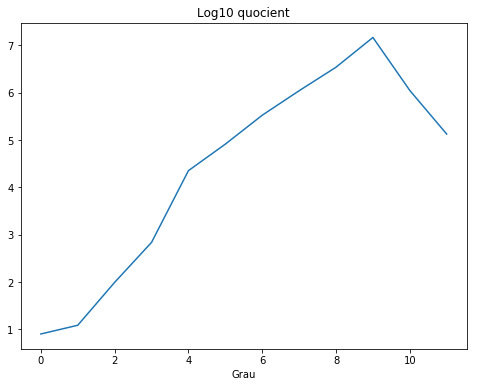

In [41]:
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(range(pcoef+1), 
         np.log10(np.abs(result.params / model_final.coef_)))
plt.xlabel('Grau')
plt.title("Log10 quocient");

 Queda per veure que el model regularitzat no és pitjor que l'inicial (no sigui que per penalitzar-li els coeficients ara sigui un model pitjor)

 primer calculem l'error pel mètode estàndar (sense regularitzar) com fins ara

In [42]:
prediccions_classic = result.predict(exog=np.vander(valid_sample.input,
                                                    pcoef+1, 
                                                    increasing=True))

In [43]:
NMSE_VA_classic = np.sum((valid_sample.target - prediccions_classic)**2)/ \
                         ((N_big-1)*np.var(valid_sample.target))
NMSE_VA_classic

4.927559835219346

 dóna terrible, com ja imaginavem

In [44]:
prediccions_regul = model_final.predict(np.vander(valid_sample.input,
                                                  pcoef+1, 
                                                  increasing=True))

In [45]:
NMSE_VA_regul = np.sum((valid_sample.target - prediccions_regul)**2)/  \
                       ((N_valid-1)*np.var(valid_sample.target))
NMSE_VA_regul

0.17365749442701298

 dóna 0.17365749442701198 , mentre que el model anterior, trobat per prova i error de M donava 0.17144211872698967; és a dir, són dos models igualment bons, però el regularitzat s'ha trobat mitjançant un mecanisme de control de complexitat que és independent del métode (només afecta la funció d'error) i el paràmetre lambda és més fàcil d'ajustar i menys sensible a fluctuacions